In [2]:
from glob import glob
import pandas as pd

In [4]:
# Opción que deshabilita el limite de columnas y filas mostradas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# Path de los archivos no-procesados (formato parquet)
path_data = '../data/raw'

In [6]:
# Crear lista de archivos en /data/raw/y-review/
review_parquets = glob(f'{path_data}/y-review/*')
review_parquets

['../data/raw/y-review/y-review_03.parquet',
 '../data/raw/y-review/y-review_02.parquet',
 '../data/raw/y-review/y-review_01.parquet']

In [7]:
# Crear dataframe donde se unen los datos extraidos de parquet
df_review = pd.DataFrame()
# Iterar por cada parquet dentro de /data/raw/y-review/
for p in review_parquets:
    # Leer parquet
    df = pd.read_parquet(p)
    # Unir a df_review
    df_review = pd.concat([df_review, df], ignore_index=True)

In [8]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [9]:
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,NRI6ZkovQxhAbtw8gV9Csg,xGTlAfrM208q533eDriJkg,9r_prQEvUixrjuIB4v5qCQ,5.0,0,1,0,Went for brunch this last Sunday with She Who ...,2017-08-21 23:26:25
1,YY1Lk8bUkcheHjWM-pWgoQ,2T48z1egd0IRwrje2PgRuw,dqdEPiPQugiz8sIgMqXmiw,4.0,5,0,3,This is a nice home-town cafe. Very casual at...,2010-10-21 15:55:32
2,V-zNEilwLRvFtrcL9sNeQw,uQe-RHxj1npBb6Tp7w2gEw,sKutdIq6xvP0Xs4rUeKNHQ,5.0,0,0,0,Some of the best ice cream ever but without a ...,2021-01-31 04:10:50
3,tT8VIru8w71KHKW8Hb2MIQ,T9nmYu1cA9yU8lsVO_S_MQ,zhg9prrh_mc-mH5m1Vw7iw,5.0,0,0,1,Joe and Kelly make the most delicious food. It...,2021-04-18 17:05:25
4,uBsJwHXcXIgzvEtnNMKeQA,hTaBY4ObN-vTNgABea55wg,L1TzHZ8OXfVXTfyzidstzg,5.0,0,0,0,Great food with fast and friendly service! I l...,2021-03-22 03:57:59


In [11]:
# Verificar la cantidad de valores nulos por columna
valores_nulos = df_review.isnull().sum()

# Mostrar las columnas con valores nulos y su cantidad
print("Valores nulos por columna:")

Valores nulos por columna:


In [12]:
# Verificar la cantidad de filas duplicadas en el DataFrame
duplicados = df_review.duplicated().sum()

# Mostrar la cantidad de filas duplicadas
print(f"Cantidad de filas duplicadas: {duplicados}")


Cantidad de filas duplicadas: 0


In [27]:

# Especificar la ruta completa al archivo Parquet
ruta_archivo_parquet = '/home/henry/PF/Henry_PF/data/raw/y-business.parquet'

# Cargar el archivo Parquet en un DataFrame (suponiendo que contiene información de negocios)
df_business = pd.read_parquet(ruta_archivo_parquet)

# Mostrar información básica del DataFrame df_business
print(df_business.info())


<class 'pandas.core.frame.DataFrame'>
Index: 150351 entries, 0 to 1543
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150351 non-null  object 
 1   name          150351 non-null  object 
 2   address       150351 non-null  object 
 3   city          150351 non-null  object 
 4   state         150348 non-null  object 
 5   postal_code   150351 non-null  object 
 6   latitude      150351 non-null  float64
 7   longitude     150351 non-null  float64
 8   stars         150351 non-null  float64
 9   review_count  150351 non-null  int64  
 10  is_open       150351 non-null  int64  
 11  attributes    136607 non-null  object 
 12  categories    150248 non-null  object 
 13  hours         127128 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 17.2+ MB
None


In [28]:
# Combinar df_review con df_business por business_id y state
df_review_con_estado = pd.merge(df_review, df_business[['business_id', 'state']], on='business_id', how='left')

# Mostrar las primeras filas del DataFrame combinado
print(df_review_con_estado.head())

                review_id                 user_id             business_id  \
0  NRI6ZkovQxhAbtw8gV9Csg  xGTlAfrM208q533eDriJkg  9r_prQEvUixrjuIB4v5qCQ   
1  YY1Lk8bUkcheHjWM-pWgoQ  2T48z1egd0IRwrje2PgRuw  dqdEPiPQugiz8sIgMqXmiw   
2  V-zNEilwLRvFtrcL9sNeQw  uQe-RHxj1npBb6Tp7w2gEw  sKutdIq6xvP0Xs4rUeKNHQ   
3  tT8VIru8w71KHKW8Hb2MIQ  T9nmYu1cA9yU8lsVO_S_MQ  zhg9prrh_mc-mH5m1Vw7iw   
4  uBsJwHXcXIgzvEtnNMKeQA  hTaBY4ObN-vTNgABea55wg  L1TzHZ8OXfVXTfyzidstzg   

   stars  useful  funny  cool  \
0    5.0       0      1     0   
1    4.0       5      0     3   
2    5.0       0      0     0   
3    5.0       0      0     1   
4    5.0       0      0     0   

                                                text                 date  \
0  Went for brunch this last Sunday with She Who ...  2017-08-21 23:26:25   
1  This is a nice home-town cafe.  Very casual at...  2010-10-21 15:55:32   
2  Some of the best ice cream ever but without a ...  2021-01-31 04:10:50   
3  Joe and Kelly make the most

In [30]:
# Obtener la lista única de estados del DataFrame df_review_con_estado
lista_estados = df_review_con_estado['state'].unique()

# Mostrar la lista de estados
print(lista_estados)


['TN' 'AZ' 'LA' 'PA' 'FL' 'CA' 'NV' 'MO' 'DE' 'NJ' 'IN' 'ID' 'IL' 'AB'
 'TX' 'XMS' 'MA' 'VI' 'VT' 'MI' 'MT' 'HI' 'SD' None 'NC' 'CO' 'WA' 'UT']


In [29]:
# Lista de estados a filtrar
estados_a_filtrar = ['PA', 'NJ', 'DE']

# Filtrar las reseñas por los estados específicos
df_review_filtrado = df_review_con_estado[df_review_con_estado['state'].isin(estados_a_filtrar)]

# Mostrar las primeras filas del DataFrame filtrado
print(df_review_filtrado.head())


                 review_id                 user_id             business_id  \
4   uBsJwHXcXIgzvEtnNMKeQA  hTaBY4ObN-vTNgABea55wg  L1TzHZ8OXfVXTfyzidstzg   
7   mrKev0mkGPk4HHptd0n0yA  sLgekUp1uedWpnDsztvkVw  VNvJuCTMdGBj4lwC0L1Ghg   
12  XiGEWAs5eqk6rMS447OkUA  v2LoAVDzWrpNgYxN8-WvtA  fiCL0hm0we0CwrCgqcdGxA   
13  AfGu2ryYNTPYpszjWLwpNw  bAmK1OzZpDkKeN_az63sMw  c0TznEkK0x57wbVEepFWrw   
14  KOQuM8Fi2Q_CxcBk8nNIMA  Q3ThRERY7YaILUK94q1pNg  kAkpIg1fp4g7kiG-hQdUZw   

    stars  useful  funny  cool  \
4     5.0       0      0     0   
7     5.0       6      1     5   
12    2.0      18      0     0   
13    5.0      15      5    10   
14    5.0       8      0     0   

                                                 text                 date  \
4   Great food with fast and friendly service! I l...  2021-03-22 03:57:59   
7   I arrived early because this was my first visi...  2018-09-30 15:01:42   
12  I for one am saddened at the downward spiral t...  2013-06-24 02:22:34   
13  One Family

In [32]:
df_review_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097812 entries, 4 to 6990413
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
 9   state        object 
dtypes: float64(1), int64(3), object(6)
memory usage: 176.1+ MB


In [38]:
df_review_filtrado.to_parquet(f'{path_data}/y-review_filtrado.parquet')

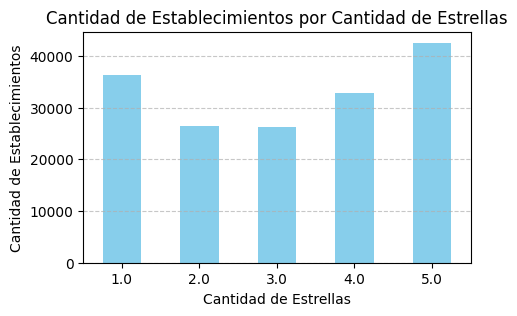

In [37]:
import matplotlib.pyplot as plt

# Contar la cantidad de establecimientos por cantidad de estrellas
establecimientos_por_estrellas = df_review_filtrado.groupby('stars')['business_id'].nunique()

# Crear el gráfico de barras
plt.figure(figsize=(5, 3))
establecimientos_por_estrellas.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Establecimientos por Cantidad de Estrellas')
plt.xlabel('Cantidad de Estrellas')
plt.ylabel('Cantidad de Establecimientos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


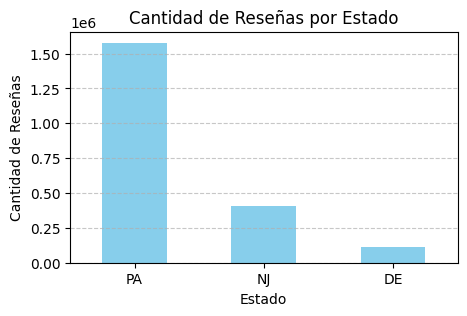

In [36]:
# Contar la cantidad de reseñas por estado
reseñas_por_estado = df_review_filtrado['state'].value_counts()

# Crear un gráfico de barras de la cantidad de reseñas por estado
plt.figure(figsize=(5, 3))
reseñas_por_estado.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Reseñas por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
